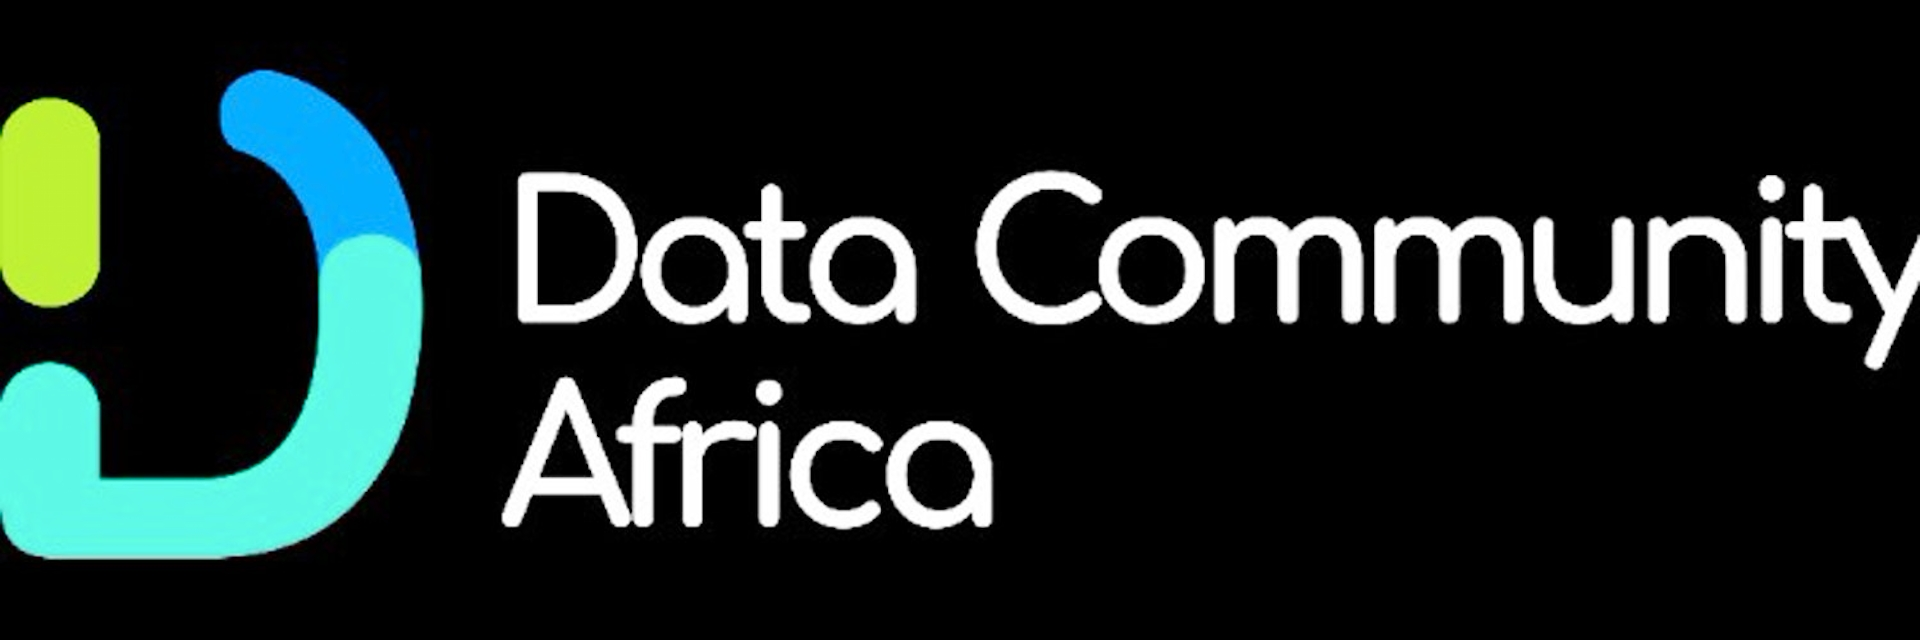

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#bringing in the data
data = pd.read_csv('/content/drive/MyDrive/cleaneddata.csv')
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Year,Month,Day,Hour
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,1,19,6,10,4533349,...,9,343,3,3,5,0,2023,1,2,7
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,0,38,5,18,4445294,...,6,688,10,13,18,1,2021,9,12,15
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,20,21,29,34,3779806,...,0,371,27,7,33,1,2023,1,12,17
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,10,30,22,16,2983424,...,20,687,24,15,32,1,2021,2,27,11
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,39,13,0,27,1757110,...,11,605,20,17,21,1,2022,9,24,4


In [ ]:
data.drop(["Transaction ID","User ID","Merchant ID","User's Email Domain","Time Taken for Transaction","Location Distance","User's Credit Score","Merchant's Reputation Score"],axis = 1, inplace = True)

In [ ]:
# importing the train_test_split library from sci-kit learn
from sklearn.model_selection import train_test_split

In [ ]:
data = data.drop('Transaction Date and Time', axis = 1)

In [ ]:
#definition of variables for the data
y = data['Fraudulent Flag']
X = data.drop('Fraudulent Flag', axis = 1)

In [ ]:
# splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 32
num_epochs = 10

model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

Epoch 1/10
112500/112500 [==============================] - 340s 3ms/step - loss: 333.5149 - accuracy: 0.4999 - val_loss: 88.5103 - val_accuracy: 0.5000
Epoch 2/10
112500/112500 [==============================] - 347s 3ms/step - loss: 210.1212 - accuracy: 0.5000 - val_loss: 441.3938 - val_accuracy: 0.5000
Epoch 3/10
112500/112500 [==============================] - 286s 3ms/step - loss: 207.0519 - accuracy: 0.5002 - val_loss: 14.6401 - val_accuracy: 0.5000
Epoch 4/10
112500/112500 [==============================] - 336s 3ms/step - loss: 205.8805 - accuracy: 0.5001 - val_loss: 66.2596 - val_accuracy: 0.5000
Epoch 5/10
112500/112500 [==============================] - 296s 3ms/step - loss: 205.4565 - accuracy: 0.5005 - val_loss: 23.6327 - val_accuracy: 0.5000
Epoch 6/10
112500/112500 [==============================] - 341s 3ms/step - loss: 209.5900 - accuracy: 0.5004 - val_loss: 63.0401 - val_accuracy: 0.5000
Epoch 7/10
112500/112500 [==============================] - 335s 3ms/step - loss:

In [ ]:
pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier, KerasRegressor

X, y = make_classification(n_samples= 1000000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=kfold)

print(f'Cross-Validation Accuracy: {results.mean()}')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Cross-Validation Accuracy: 0.97983625
Test Accuracy: 0.97933


The model was built with a million rows from the dataset due to the size of the data and an accuracy of 97% was gotten